In [1]:
import numpy as np
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/local/VANDERBILT/litz/github/MASILab/thoraxtools")
import func.vis.vis as vis
import glob
import re

In [9]:
def showslice(img, z, y, x, is_gray=False, clip_range=[]):
    clip_ax = img[z, :, :]
    clip_cor = img[:,y,:]
    clip_cor = np.flip(clip_cor, 0)
    clip_sag = img[:,:,x]
    clip_sag = np.flip(clip_sag, 0)
    if len(clip_range) > 0:
        vmin = clip_range[0]
        vmax = clip_range[1]
    else:
        vmax = np.max(img)
        vmin = np.min(img)
    # fig = plt.figure(1)
    f, ax = plt.subplots(1, 3, figsize=(15, 15))
    if is_gray:
        ax[0].imshow(clip_ax, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        ax[1].imshow(clip_cor, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        sag = ax[2].imshow(clip_sag, interpolation='nearest', cmap='gray', vmin=vmin, vmax=vmax)
        
    else:
        ax[0].imshow(clip_ax, interpolation='nearest', vmin=vmin, vmax=vmax)
        ax[1].imshow(clip_cor, interpolation='nearest', vmin=vmin, vmax=vmax)
        sag = ax[2].imshow(clip_sag, interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.colorbar(sag, ax=ax[2], fraction=0.046, pad=0.04)

In [6]:
raw_dir = "/home/local/VANDERBILT/litz/data/lola/raw"
raw_name = "lola11-54.mha"
raw_path = os.path.join(raw_dir, raw_name)

In [7]:
raw_sitk = sitk.ReadImage(raw_path)
raw_img = sitk.GetArrayFromImage(raw_sitk)

(298, 512, 512)


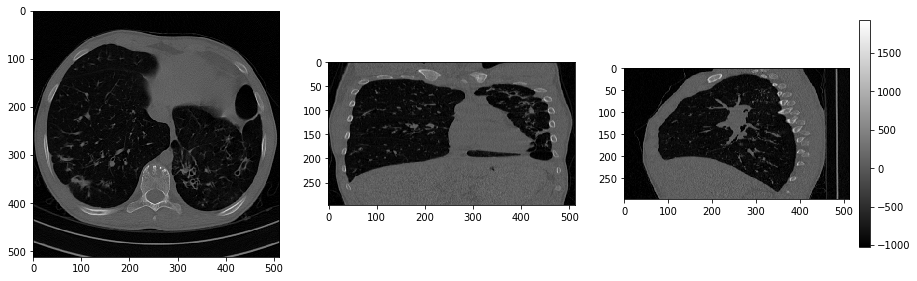

In [10]:
print(raw_img.shape)
showslice(raw_img, 100,200,200, is_gray=True)